# What drives the price of a car?

![](https://github.com/sandrayu49/Berkeley_AI_Module11_UsedCar_Price_Analysis/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Problem Statements**

What are the determining factors for used car prices?
Which model predict the more accurate car price?


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
data = pd.read_csv('data/vehicles.csv')

In [115]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [123]:
data_cleaned = data.dropna()
data_filtered = data_cleaned.query('price > 0 and title_status == "clean" and cylinders != "other"')
data_trunc = data_filtered.drop(columns=['id', 'region', 'manufacturer', 'model', 'condition', 'title_status', 'VIN', 'state']).reset_index(drop=True)
data_trunc

,price,year,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,4000,2002.0,4 cylinders,gas,155000.0,automatic,fwd,compact,sedan,blue
1,2500,1995.0,6 cylinders,gas,110661.0,automatic,rwd,mid-size,sedan,white
2,9000,2008.0,4 cylinders,gas,56700.0,automatic,rwd,compact,convertible,white
3,8950,2011.0,6 cylinders,gas,164000.0,automatic,fwd,full-size,truck,white
4,4000,1972.0,6 cylinders,gas,88100.0,automatic,rwd,full-size,coupe,silver
...,...,...,...,...,...,...,...,...,...,...
31229,23495,2015.0,8 cylinders,gas,146795.0,automatic,4wd,full-size,truck,black
31230,12995,2016.0,4 cylinders,gas,61127.0,automatic,fwd,compact,sedan,silver
31231,32999,2014.0,8 cylinders,diesel,154642.0,automatic,4wd,full-size,pickup,brown
31232,15999,2018.0,4 cylinders,gas,36465.0,automatic,fwd,mid-size,sedan,black


In [124]:
print(f"color categories: {data_trunc['paint_color'].unique()}")
print(f"vehicle type: {data_trunc['type'].unique()}")

color categories: ['blue' 'white' 'silver' 'red' 'grey' 'black' 'green' 'custom' 'yellow'
 'orange' 'brown' 'purple']
vehicle type: ['sedan' 'convertible' 'truck' 'coupe' 'SUV' 'hatchback' 'wagon' 'pickup'
 'other' 'van' 'mini-van' 'offroad' 'bus']


In [125]:
# Label encoding
cylinder_mapping = {"4 cylinders": 4, "6 cylinders": 6, "8 cylinders": 8}
fuel_mapping = {"gas": 1, "diesel": 0}
transmission_mapping = {"automatic": 1, "manual": 0}
drive_mapping = {"rwd": 1, "fwd": 0}
size_mapping = {"full-size": 2, "mid-size": 1, "compact": 0}

data_trunc['cylinders_num'] = data_trunc['cylinders'].map(cylinder_mapping)
data_trunc['fuel_num'] = data_trunc['fuel'].map(fuel_mapping)
data_trunc['transmission_num'] = data_drop['transmission'].map(transmission_mapping)
data_trunc['drive_num'] = data_drop['drive'].map(drive_mapping)
data_trunc['size_num'] = data_trunc['size'].map(size_mapping)

data_trunc['paint_color_num'] = data_trunc['paint_color'].astype('category').cat.codes
data_trunc['type_num'] = data_trunc['type'].astype('category').cat.codes

data_encoded = data_trunc.drop(columns=['cylinders', 'fuel', 'transmission', 'drive', 'size', 'paint_color', 'type'])
data_cleaned = data_encoded.dropna()
data_cleaned

,price,year,odometer,cylinders_num,fuel_num,transmission_num,drive_num,size_num,paint_color_num,type_num
0,4000,2002.0,155000.0,4.0,1.0,1.0,0.0,0.0,1,9
1,2500,1995.0,110661.0,6.0,1.0,1.0,1.0,1.0,10,9
2,9000,2008.0,56700.0,4.0,1.0,1.0,1.0,0.0,10,2
3,8950,2011.0,164000.0,6.0,1.0,1.0,0.0,2.0,10,10
4,4000,1972.0,88100.0,6.0,1.0,1.0,1.0,2.0,9,3
...,...,...,...,...,...,...,...,...,...,...
31210,10999,2015.0,96823.0,4.0,1.0,1.0,0.0,1.0,9,9
31222,31995,2020.0,18701.0,6.0,1.0,1.0,0.0,2.0,10,11
31230,12995,2016.0,61127.0,4.0,1.0,1.0,0.0,0.0,9,9
31232,15999,2018.0,36465.0,4.0,1.0,1.0,0.0,1.0,0,9


       price    year  odometer  cylinders_num  fuel_num  transmission_num  \
0       4000  2002.0  155000.0            4.0       1.0               1.0   
1       2500  1995.0  110661.0            6.0       1.0               1.0   
2       9000  2008.0   56700.0            4.0       1.0               1.0   
3       8950  2011.0  164000.0            6.0       1.0               1.0   
4       4000  1972.0   88100.0            6.0       1.0               1.0   
...      ...     ...       ...            ...       ...               ...   
31210  10999  2015.0   96823.0            4.0       1.0               1.0   
31222  31995  2020.0   18701.0            6.0       1.0               1.0   
31230  12995  2016.0   61127.0            4.0       1.0               1.0   
31232  15999  2018.0   36465.0            4.0       1.0               1.0   
31233   6800  1997.0   69550.0            8.0       1.0               1.0   

       drive_num  size_num  paint_color_num  type_num  
0            0.0   

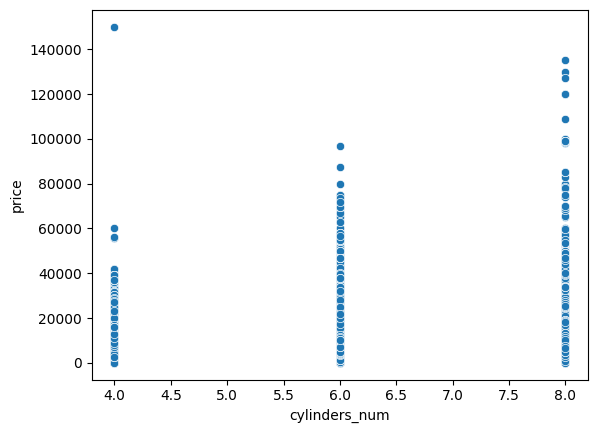

In [187]:
def plot_scatter(df: pd.DataFrame, x: str, y: str = 'price'):
  Q1 = df[x].quantile(0.15)
  Q3 = df[x].quantile(0.85)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers_iqr = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]
  print(df_no_outliers_iqr)
  sns.scatterplot(data=df_no_outliers_iqr, x=x, y=y)

plot_scatter(df=data_cleaned, x='cylinders_num')


In [119]:
# Onehot encoding
def onehot_encode():
  print(data_trunc)
  data_encoded = pd.get_dummies(data_trunc, columns=['cylinders', 'fuel', 'transmission', 'drive', 'size', 'paint_color', 'type'])
  data_cleaned = data_encoded.dropna()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

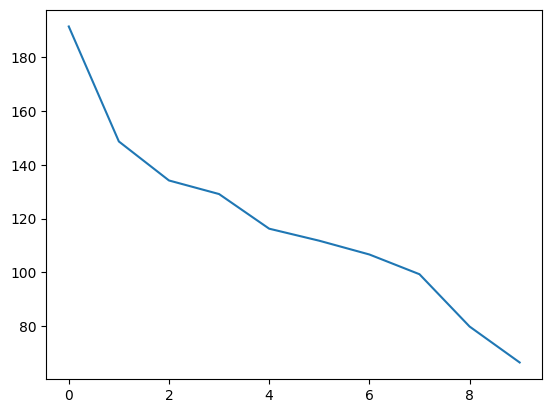

In [126]:
# PCA
from scipy.linalg import svd

data_stand = (data_cleaned - data_cleaned.mean()) / data_cleaned.std()
U, sigma, Vt = svd(data_stand, full_matrices = False)
plt.plot(sigma)

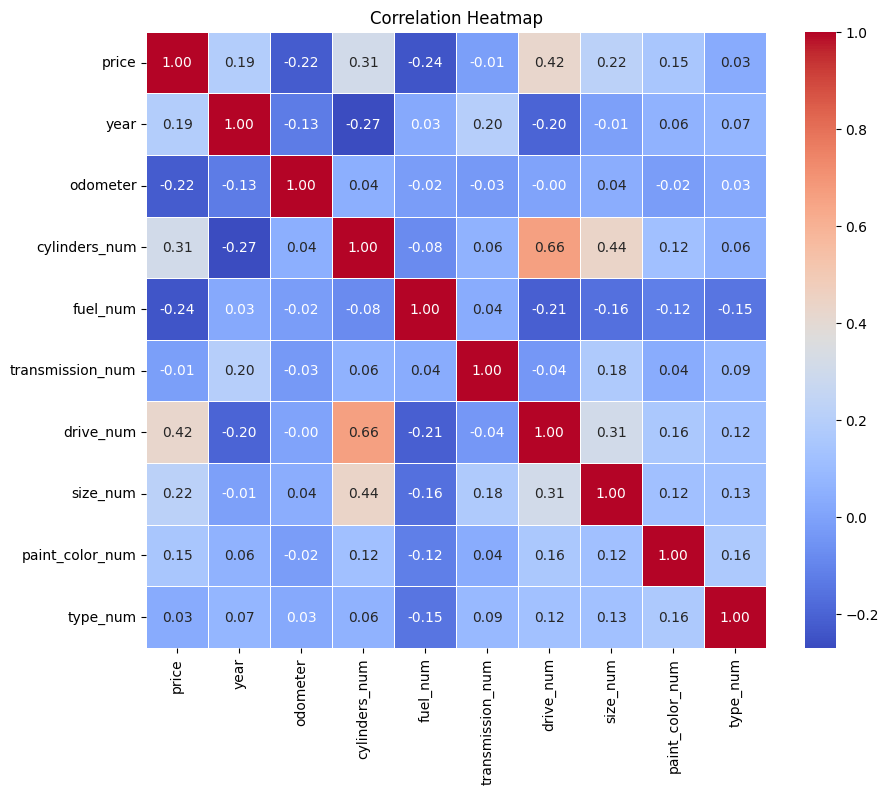

In [127]:
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better readability
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [128]:
# Split data into training and test sets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, np.arange(len(X)), test_size = 0.3, random_state = 42)

X_train

,year,odometer,cylinders_num,fuel_num,transmission_num,drive_num,size_num,paint_color_num,type_num
4530,2014.0,122184.0,4.0,1.0,1.0,0.0,1.0,2,9
3463,2015.0,98000.0,4.0,1.0,1.0,0.0,2.0,1,9
16204,2006.0,110812.0,6.0,1.0,1.0,0.0,1.0,10,0
22277,2019.0,23004.0,8.0,1.0,1.0,1.0,2.0,10,10
2046,2004.0,164600.0,4.0,1.0,1.0,0.0,2.0,10,0
...,...,...,...,...,...,...,...,...,...
9610,2015.0,16176.0,6.0,1.0,1.0,0.0,2.0,10,5
27277,2020.0,12054.0,6.0,1.0,1.0,1.0,2.0,10,0
9931,2014.0,103231.0,4.0,1.0,1.0,0.0,2.0,0,9
1549,1998.0,136298.0,4.0,1.0,1.0,1.0,0.0,0,3


In [198]:
# Ridge
from sklearn.preprocessing import PolynomialFeatures

scaled_ridge_model = Pipeline([
    ('transform', PolynomialFeatures(degree=3, include_bias = False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.9142857142857143))
])

scaled_ridge_model.fit(X_train, y_train)
y_pred_ridge = scaled_ridge_model.predict(X_train)
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
print(f"Mean Squared Error Train (Ridge): {mse_ridge}")
print(f"Model score: {scaled_ridge_model.score(X_train, y_train)}")

y_pred_ridge_test = scaled_ridge_model.predict(X_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)

print(f"Mean Squared Error Test(Ridge): {mse_ridge_test}")
print(f"Model score test: {scaled_ridge_model.score(X_test, y_test)}")

Mean Squared Error Train (Ridge): 39851646.01775921
Model score: 0.6258142468511997
Mean Squared Error Test(Ridge): 44091851.6846072
Model score test: 0.5892026562546563


In [191]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters_to_try = {'ridge__alpha': 10*np.linspace(0.01, 4, 50)}
#parameters_to_try = {'ridge__alpha': [0.001, 0.01, 1.0, 10.0, 100.0]}
print(f"params: {parameters_to_try}")
model_finder = GridSearchCV(estimator = scaled_ridge_model,
                            param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',
                            cv = [[train_idx, test_idx]])
model_finder.fit(X, y)
print(model_finder.best_params_)

params: {'ridge__alpha': array([ 0.1       ,  0.91428571,  1.72857143,  2.54285714,  3.35714286,
        4.17142857,  4.98571429,  5.8       ,  6.61428571,  7.42857143,
        8.24285714,  9.05714286,  9.87142857, 10.68571429, 11.5       ,
       12.31428571, 13.12857143, 13.94285714, 14.75714286, 15.57142857,
       16.38571429, 17.2       , 18.01428571, 18.82857143, 19.64285714,
       20.45714286, 21.27142857, 22.08571429, 22.9       , 23.71428571,
       24.52857143, 25.34285714, 26.15714286, 26.97142857, 27.78571429,
       28.6       , 29.41428571, 30.22857143, 31.04285714, 31.85714286,
       32.67142857, 33.48571429, 34.3       , 35.11428571, 35.92857143,
       36.74285714, 37.55714286, 38.37142857, 39.18571429, 40.        ])}
{'ridge__alpha': np.float64(0.9142857142857143)}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.